In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import os 
import sys

projRootPath =  os.path.abspath(os.path.join('.' ,"../.."))
print("Project root path is: ", projRootPath)
sys.path.append(projRootPath)

from src.utils.path_manipulation import contains_filetype
from src.utils.viz_functions import make_mel_spectrogram

# modules for visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# modules for data processing
import numpy as np
from scipy import signal
from scipy.io import wavfile
import wave
import struct

# modules for data mining
import sklearn

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

from pydub import AudioSegment

Project root path is:  D:\Programming\AudioMining


In [5]:
# Get data files
dataDirName = "data"
rawDataDirName = "converted_wav"
className1 = "violin"
data_path1 = os.path.join(projRootPath, dataDirName, rawDataDirName, className1)

print("Original samples in ", data_path1)
root_paths = []

# Get all files from data_path 
# r=root, d=directories, f = files
(_, d, allFiles) = next(os.walk(data_path1))
wavFiles1 = [f for f in allFiles if f.endswith(".wav")]

Original samples in  D:\Programming\AudioMining\data\converted_wav\violin
[]


#### Load one sound file as numpy array

In [24]:
chosenFile = wavFiles1[3]
soundSample, fs = librosa.load(os.path.join(data_path1, chosenFile), sr=None)
IPython.display.Audio(soundSample, rate=fs)

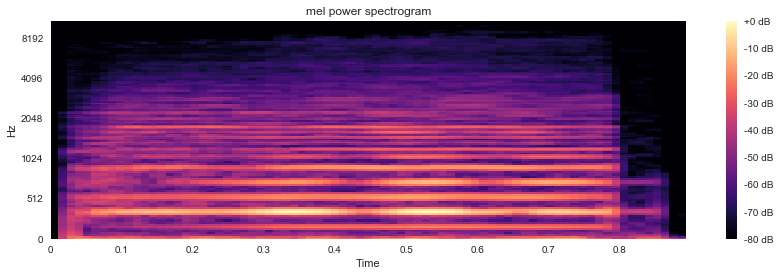

In [25]:
make_mel_spectrogram(soundSample, fs)

Min val  -0.037628174
Max val  0.04107666


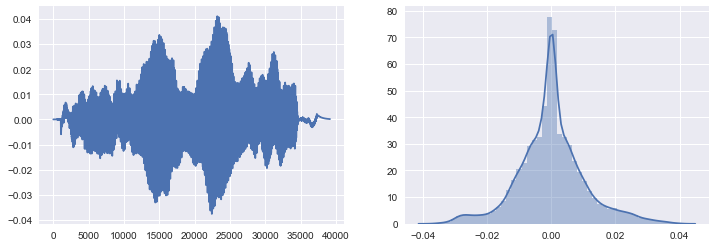

In [35]:
minObserved = min(soundSample)
maxObserved = max(soundSample)

print("Min val ", minObserved)
print("Max val ", maxObserved)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(soundSample)

plt.subplot(1, 2, 2)
sns.distplot(soundSample)

#### Generate zero mean white noise

In [28]:
def range_map(x, inp_range, out_range):
    return (x - inp_range[0]) * (out_range[1] - out_range[0]) / (inp_range[1] - inp_range[0]) + out_range[0]


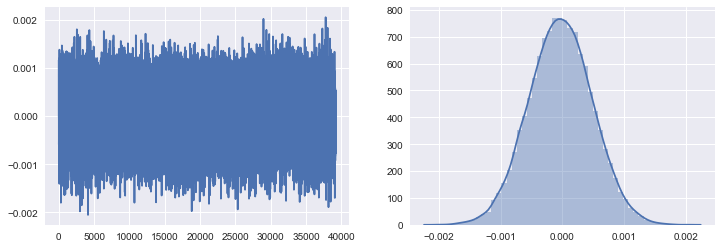

In [45]:
mean = 0
std = 1 
num_samples = len(soundSample) 
noiseSample = np.random.normal(mean, std, size=num_samples)

# rescale to -1, 1
noiseSample = range_map(noiseSample, [min(noiseSample), max(noiseSample)], [-1, 1])

# rescale to coeff
sclFact = 0.
noiseSample = noiseSample * ( maxObserved / 100 * 5) 

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(noiseSample)

plt.subplot(1, 2, 2)
sns.distplot(noiseSample)


In [46]:
# Add sample and noise 
mixedSample = soundSample + noiseSample

### Review

In [47]:
# Original sample
IPython.display.Audio(soundSample, rate=fs)

In [48]:
# Noise 
IPython.display.Audio(noiseSample, rate=fs)

In [49]:
# Mixed sample
IPython.display.Audio(mixedSample, rate=fs)